In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import os

%matplotlib inline

In [19]:
def load_data(number_thread, data_loc='./data/'):
    df_list = []
    for i in range(1, number_thread+1):
        try:
            temp_df = pd.read_csv(
                '{}{}/{}.txt'.format(data_loc, number_thread, i),
                header=None
            )
            temp_df.columns = ['time', 'event_number']
            temp_df.insert(2, 'thread_number', number_thread)
            # index start from 1
            temp_df.insert(3, 'thread_index', i)
            df_list.append(temp_df)
        except:
            pass
    return pd.concat(df_list, ignore_index=True)

In [54]:
number_thread = 4
df = load_data(number_thread)
df

,time,event_number,thread_number,thread_index
0,5984232213,498081,4,1
1,2869146931,240456,4,1
2,3294027368,278511,4,1
3,3634770280,311211,4,1
4,3802420401,323237,4,1
...,...,...,...,...
26474,821361609,71943,4,4
26475,896811483,78696,4,4
26476,2878854433,249913,4,4
26477,4776982649,410966,4,4


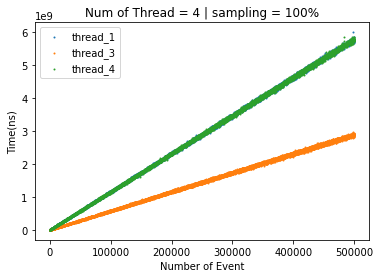

In [59]:
for i in df['thread_index'].unique():
#     if i != 4:
    current_df = df[df['thread_index'] == i]
    sample_ratio = 1
    df_sample = current_df.sample(frac=sample_ratio)
    plt.scatter(df_sample['event_number'], df_sample['time'], s=1, label='thread_{}'.format(i))
    plt.title('Num of Thread = {} | sampling = {}%'.format(number_thread, sample_ratio*100))
    plt.ylabel('Time(ns)')
    plt.xlabel('Number of Event')
    plt.legend()
plt.show()

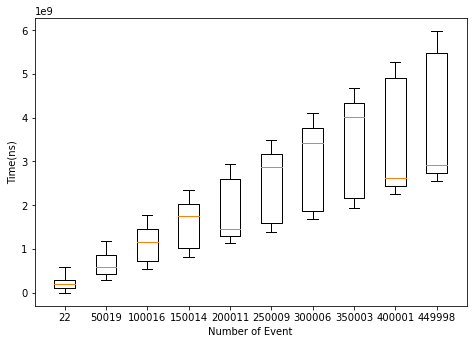

In [55]:
maximum, minimum = df['event_number'].max(), df['event_number'].min()
number_bin = 10
    
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(
    [df[(df['event_number'] > minimum + i * (maximum-minimum)/10) 
       & (df['event_number'] < minimum + (i + 1) * (maximum-minimum)/10)]['time'] for i in range(number_bin)],
    positions=[ int(minimum + i * (maximum-minimum)/10) for i in range(number_bin)], 
    widths = [ (maximum-minimum)/10/2 for i in range(number_bin)], 
    showfliers=True)

plt.ylabel('Time(ns)')
plt.xlabel('Number of Event');

# ax.legend([ '{}: dataset{}'.format(i, i) for i in range(1,6)] + ['6: Full Set'], bbox_to_anchor=(1.1, 1))
plt.show()

In [60]:
df_shuffle = df.sample(frac=1)
X, Y = np.array([ [item] for item in df_shuffle['event_number'] ]), df_shuffle['time']
split = int(0.95 * len(X))
train_x = X[:split]
test_x =X[split:]

train_y = Y[:split]
test_y =Y[split:]

In [61]:
def mean_absolute_percentage_error(pred_y, test_y):
    return np.mean(np.abs((test_y - pred_y) / test_y))

In [62]:
reg = LinearRegression().fit(train_x, train_y)
# reg.coef_
# reg.intercept_
# reg.predict(np.array([[3, 5]]))
# reg.coef_, reg.intercept_
# reg.score(test_x, test_y)
prediction = reg.predict(test_x)
MAE = mean_absolute_error(prediction, test_y)
MAPE = mean_absolute_percentage_error(prediction, test_y)
print('MAE = {:.2f}(ns)\nMAPE = {:.2f}%'.format(MAE, MAPE*100))

MAE = 731856681.11(ns)
MAPE = 38.08%


In [63]:
def abline(slope, intercept, color='r'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color=color)

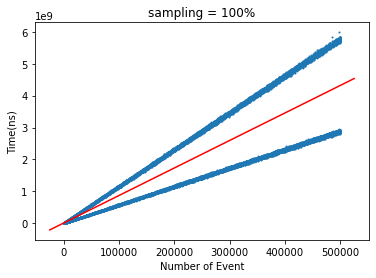

In [64]:
sample_ratio = 1
df_sample = df.sample(frac=sample_ratio)
plt.scatter(df_sample['event_number'], df_sample['time'], s=1)
plt.title('sampling = {}%'.format(sample_ratio*100))
plt.ylabel('Time(ns)')
plt.xlabel('Number of Event');
abline(reg.coef_, reg.intercept_)
plt.show()